# Pendahuluan
Proyek ini bertujuan untuk menganalisis dan memahami perilaku pelanggan dalam konteks pemasaran menggunakan teknik machine learning, dengan fokus pada segmentasi pelanggan berdasarkan karakteristik pengeluaran dan demografis. Dalam dunia pemasaran, segmentasi pelanggan adalah salah satu strategi yang penting untuk menyesuaikan penawaran produk dan layanan dengan kebutuhan dan preferensi pelanggan yang berbeda. Dengan memahami kelompok-kelompok pelanggan ini, perusahaan dapat merancang kampanye pemasaran yang lebih efektif dan meningkatkan pengelolaan sumber daya.

Pada proyek ini, data yang digunakan berasal dari dataset pemasaran yang mencakup berbagai fitur pelanggan seperti pengeluaran pada berbagai kategori produk, status pernikahan, pendidikan, serta kebiasaan berbelanja. Metode analisis yang diterapkan meliputi pengolahan data awal, pemetaan fitur-fitur kategorikal, dan penggunaan teknik pengurangan dimensi melalui Principal Component Analysis (PCA). Untuk segmentasi, metode klastering K-Means digunakan untuk mengidentifikasi kelompok-kelompok pelanggan berdasarkan pola pembelian dan karakteristik mereka.

Hasil dari proyek ini memberikan wawasan mendalam mengenai pola pengeluaran, preferensi belanja, serta respons terhadap promosi dari masing-masing segmen pelanggan. Temuan-temuan ini dapat menjadi dasar untuk strategi pemasaran yang lebih terarah, membantu perusahaan dalam meningkatkan pengalaman pelanggan dan efektivitas kampanye pemasaran yang lebih personalized.



# Mengimpor Pustaka yang Diperlukan
Langkah pertama adalah mengimpor pustaka yang diperlukan untuk analisis data, visualisasi, preprocessing, dan penerapan algoritma K-Means.

In [75]:
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi data tabular
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data tingkat lanjut
import missingno  # Untuk visualisasi data yang hilang
from sklearn.preprocessing import LabelEncoder  # Untuk encoding data kategori
from sklearn.preprocessing import StandardScaler  # Untuk standardisasi data
from sklearn.decomposition import PCA  # Untuk reduksi dimensi
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah cluster optimal
from sklearn.cluster import KMeans  # Untuk penerapan algoritma K-Means
from mpl_toolkits.mplot3d import Axes3D  # Untuk visualisasi data dalam 3D
from sklearn.metrics import silhouette_score

# Membaca Dataset
Dataset customer segmentation diimpor menggunakan Pandas. File ini dipisahkan oleh tab (\t), sehingga perlu ditentukan separatornya saat membaca file.

In [76]:
df_marketing = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Memeriksa Struktur Dataset
Langkah ini dilakukan untuk memahami struktur dataset, termasuk tipe data di setiap kolom dan adanya nilai yang hilang. Informasi ini berguna untuk langkah preprocessing selanjutnya.

In [77]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Jumlah Data: Dataset ini memiliki 2.240 entri (baris), dengan total 29 kolom.

Tipe Data:
Numerik (Integer dan Float): Sebagian besar kolom berupa data numerik seperti Income, MntWines, NumWebPurchases, dan lainnya. Tipe data numerik ini mencakup informasi mengenai pengeluaran, pembelian, dan jumlah interaksi pelanggan.
Kategorikal (Object): Beberapa kolom seperti Education, Marital_Status, dan Dt_Customer menyimpan data kategori atau teks.

Kolom Penting:
ID: Identifier unik untuk setiap pelanggan.
Year_Birth: Tahun kelahiran pelanggan.
Income: Pendapatan pelanggan, namun terdapat beberapa nilai yang hilang.
AcceptedCmp1 - AcceptedCmp5: Kolom yang menunjukkan apakah pelanggan menerima promosi atau kampanye tertentu.
MntWines, MntFruits, MntMeatProducts, dll: Kolom ini menggambarkan pengeluaran pelanggan untuk kategori produk tertentu.
Response: Apakah pelanggan merespons kampanye pemasaran.
Recency: Seberapa baru interaksi pelanggan dengan perusahaan.

# Visualisasi Data yang Hilang dan Imputasi
Langkah ini bertujuan untuk memvisualisasikan distribusi nilai yang hilang di dataset. Dengan diagram matriks dari missingno, kita dapat melihat kolom mana saja yang memiliki banyak nilai kosong.

<Axes: >

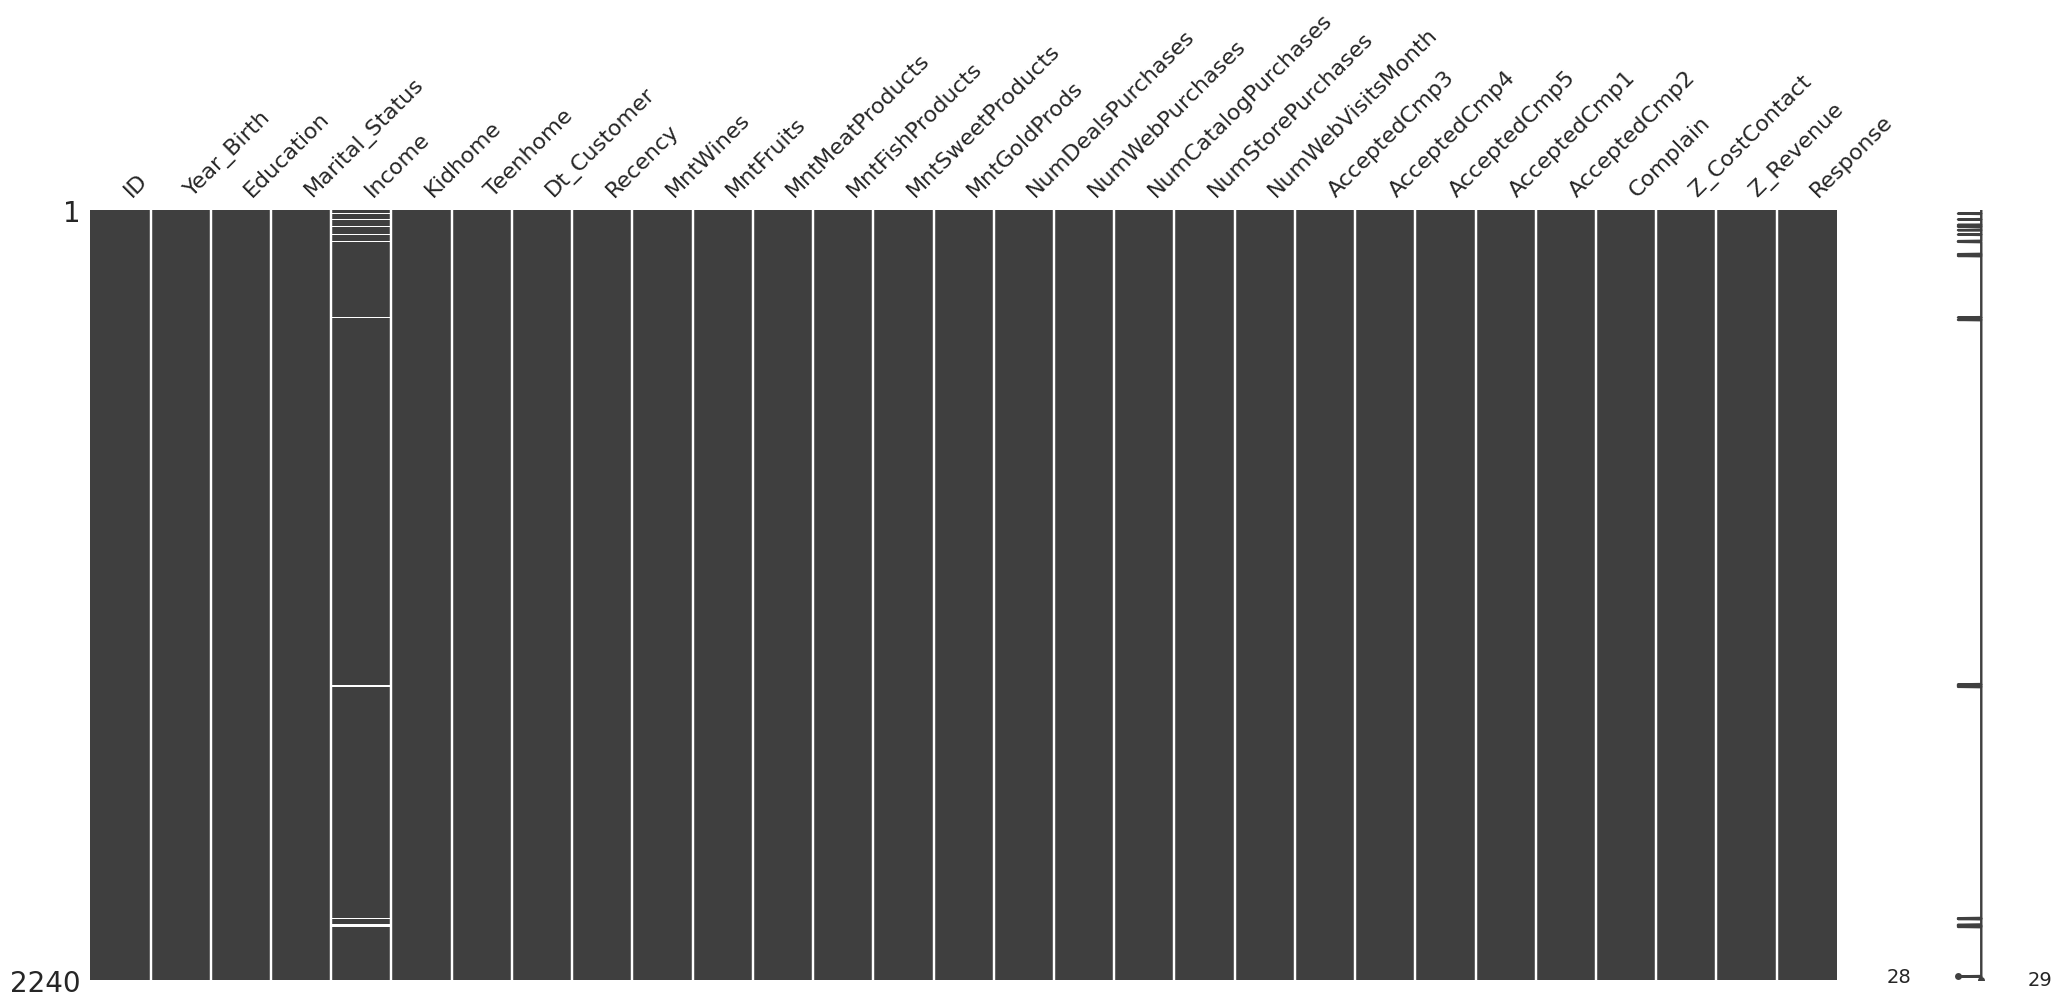

In [78]:
missingno.matrix(df_marketing)

In [79]:
df_marketing.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terlihat bahwa terdapat 24 data point yang kosong pada kolom Income.

# Mengisi Nilai Hilang pada Kolom Income dengan Mean
Langkah ini bertujuan untuk mengisi nilai yang hilang di kolom Income menggunakan rata-rata (mean). Rata-rata ini dihitung dari nilai yang tersedia dalam kolom tersebut. Imputasi mean dipilih karena data penghasilan diasumsikan tidak terlalu terpengaruh oleh outlier.

In [80]:
df_fill_mean = df_marketing.copy()  # Membuat salinan dataset asli
income_mean = np.round(df_fill_mean["Income"].mean())  # Menghitung rata-rata kolom Income
df_fill_mean["Income"] = df_fill_mean["Income"].fillna(income_mean)  # Mengisi nilai yang hilang dengan mean
print(income_mean)  # Menampilkan mean yang digunakan

52247.0


<Axes: >

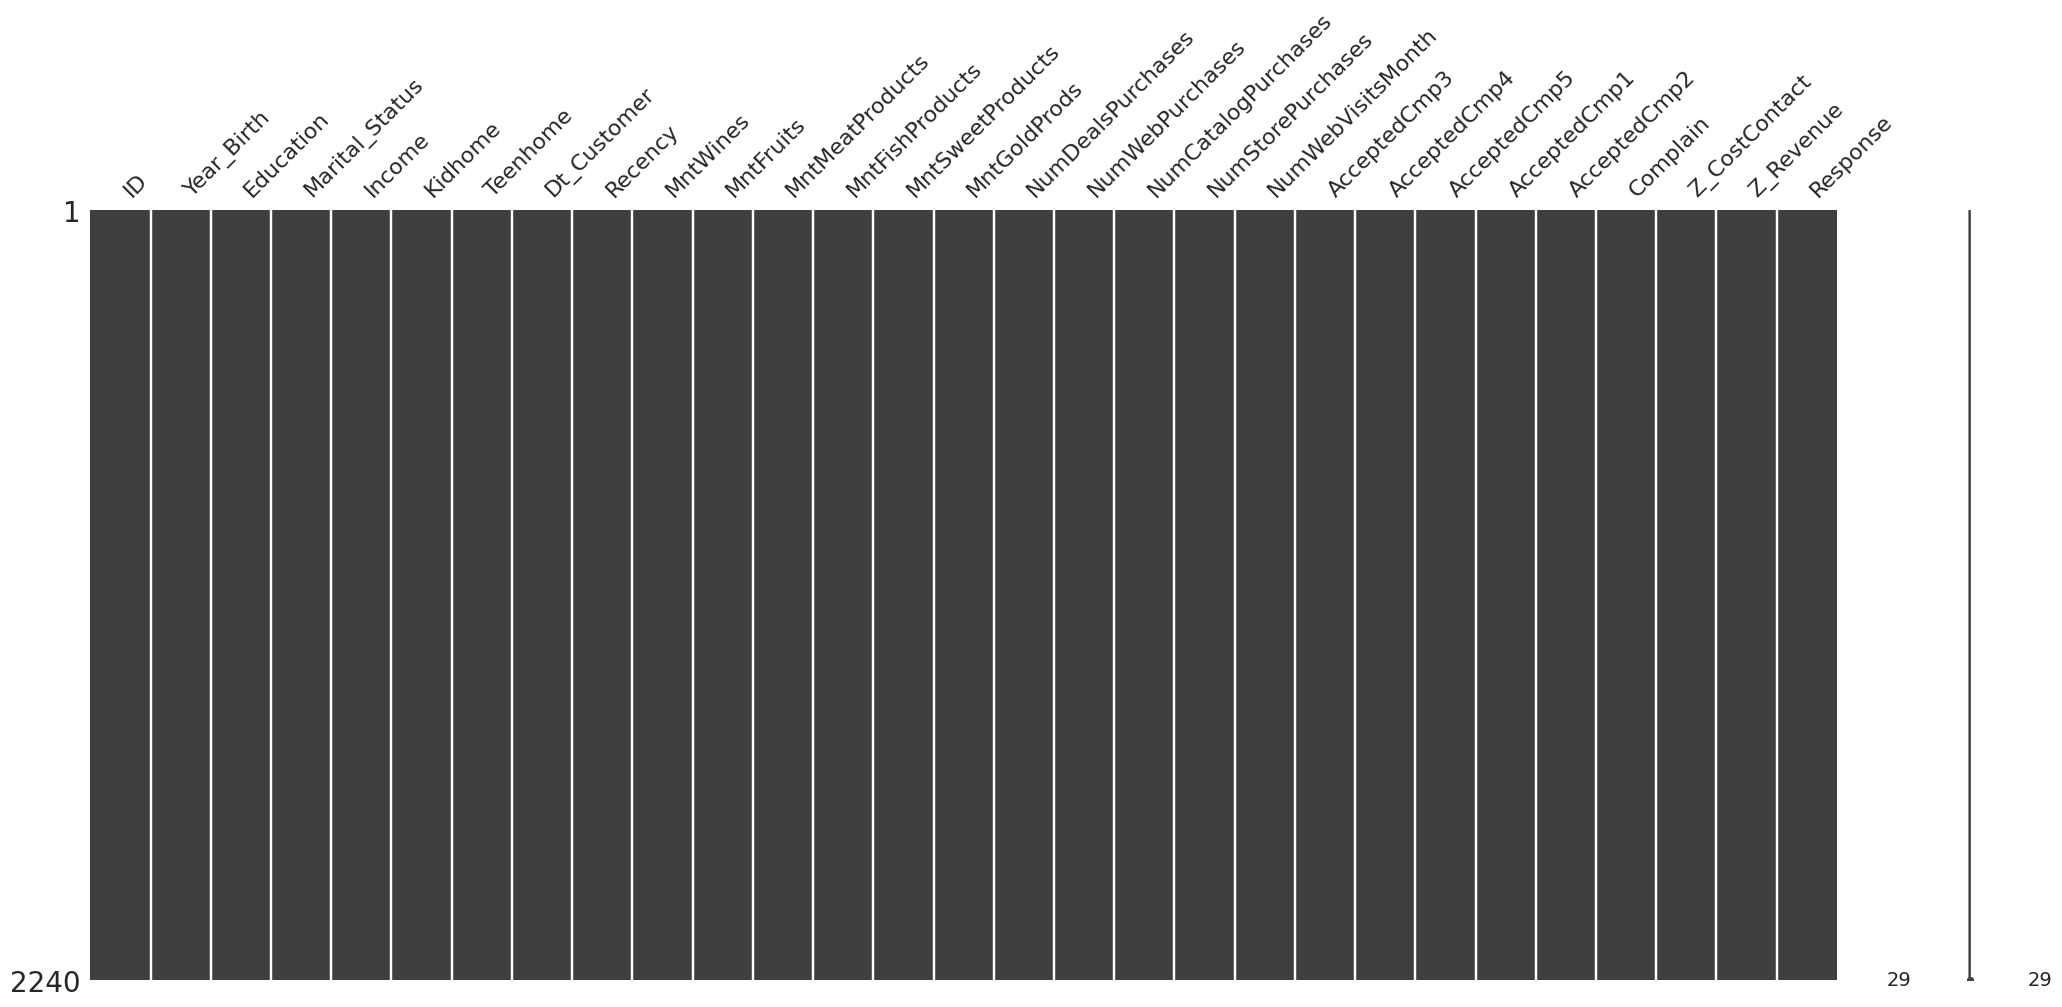

In [81]:
missingno.matrix(df_fill_mean)

Didapat dataset yang telah diimputasi.

# Eksplorasi Dataset

In [82]:
df = df_marketing.copy()
df = df.drop(columns=["ID"])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


Kolom ID berisi identifier unik untuk setiap pelanggan dan tidak diperlukan untuk analisis lebih lanjut, karena tidak memberikan informasi yang relevan. Oleh karena itu, kolom ini dihapus dari dataset.

In [83]:
df["Year_Birth"].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [84]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [85]:
print("Total categories in the feature Education:\n", df_marketing["Education"].value_counts())

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [86]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [87]:
print("Total categories in the feature Marital_Status:\n", df_marketing["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [88]:
df["Dt_Customer"].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [89]:
len(df["Dt_Customer"].unique())

663

# Outlier
Peninjuan outlier.

In [90]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Preprocessing Dataset:


* Menghitung usia pelanggan berdasarkan tahun kelahiran.
* Menghitung total pengeluaran pelanggan untuk produk yang berbeda.
* Mengelompokkan status pernikahan menjadi dua kategori dan mengubahnya menjadi format numerik.
* Menggabungkan data anak-anak dan remaja menjadi satu kolom Children.
* Menghitung ukuran keluarga berdasarkan status hidup dan jumlah anak.
* Mengelompokkan status pendidikan menjadi tiga kategori besar untuk analisis lebih lanjut.
* Memberikan nama yang lebih jelas pada kolom-kolom pengeluaran.
* Menghapus kolom yang tidak relevan atau redundan.



In [91]:
df_marketing['Age'] = 2024 - df_marketing['Year_Birth']  # Menghitung usia
df_marketing = df_marketing.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})  # Nama kolom yang lebih jelas
df_marketing["Spent"] = df_marketing["Wines"] + df_marketing["Fruits"] + df_marketing["Meat"] + df_marketing["Fish"] + df_marketing["Sweets"] + df_marketing["Gold"]  # Total pengeluaran
df_marketing["Living_With"] = df_marketing["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df_marketing["Living_With"] = df_marketing["Living_With"].replace({"Alone": 1, "Partner": 2})  # Status pernikahan
df_marketing["Children"] = df_marketing["Kidhome"] + df_marketing["Teenhome"]  # Menggabungkan anak-anak dan remaja
df_marketing["Family_Size"] = df_marketing["Living_With"] + df_marketing["Children"]  # Ukuran keluarga
df_marketing["Education"] = df_marketing["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})  # Pendidikan
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]  # Kolom yang tidak relevan
df_marketing = df_marketing.drop(to_drop, axis=1)  # Menghapus kolom redundan

/tmp/ipykernel_34/151101611.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_marketing["Living_With"] = df_marketing["Living_With"].replace({"Alone": 1, "Partner": 2})  # Status pernikahan


# Statistik Deskriptif untuk Data Numerik
Langkah ini memberikan gambaran umum tentang distribusi nilai dalam dataset menggunakan fungsi describe(), yang memberikan informasi tentang statistik dasar untuk kolom-kolom numerik.

In [92]:
df_marketing.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,605.798214,1.644643,0.950446,2.595089
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.478728,0.751803,0.906959
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,1.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,1.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,2.000000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1045.500000,2.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,2.000000,3.000000,5.000000


Ada outlier pada `income` dengan nilai $666666$ dan `Age` dengan nilai $131$.

In [93]:
# Menghapus outlier dengan menetapkan batas pada usia dan pendapatan
df_marketing = df_marketing[(df_marketing["Age"] < 90)]  # Menghapus data dengan usia lebih dari 90
df_marketing = df_marketing[(df_marketing["Income"] < 600000)]  # Menghapus data dengan pendapatan lebih dari 600.000
print("Jumlah data setelah menghapus outlier adalah:", len(df_marketing))  # Menampilkan jumlah data setelah pembersihan

Jumlah data setelah menghapus outlier adalah: 2212


In [94]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

Langkah ini digunakan untuk mendapatkan statistik deskriptif bagi beberapa kolom numerik yang dipilih, seperti usia, status pernikahan, jumlah anak, ukuran keluarga, pendapatan, pengeluaran, dan keluhan. Hal ini memberikan gambaran lebih mendalam tentang distribusi data di masing-masing kolom.

In [95]:
df_marketing[['Age','Living_With', 'Children', 'Family_Size', 'Income', 'Spent', 'Complain']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2212.0,55.086347,11.701599,28.0,47.0,54.0,65.0,84.0
Living_With,2212.0,1.645570,0.478449,1.0,1.0,2.0,2.0,2.0
Children,2212.0,0.947559,0.749466,0.0,0.0,1.0,1.0,3.0
Family_Size,2212.0,2.593128,0.906236,1.0,2.0,3.0,3.0,5.0
Income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.0,162397.0
Spent,2212.0,607.268083,602.513364,5.0,69.0,397.0,1048.0,2525.0
Complain,2212.0,0.009042,0.094678,0.0,0.0,0.0,0.0,1.0


# Visualisasi Data Kontinu dan Kategorikal
Langkah ini bertujuan untuk membuat visualisasi data dalam bentuk histogram dan count plot. Histogram digunakan untuk data kontinu seperti usia dan pendapatan, sedangkan count plot digunakan untuk data kategorikal seperti status pernikahan, jumlah anak, dan tingkat pendidikan.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


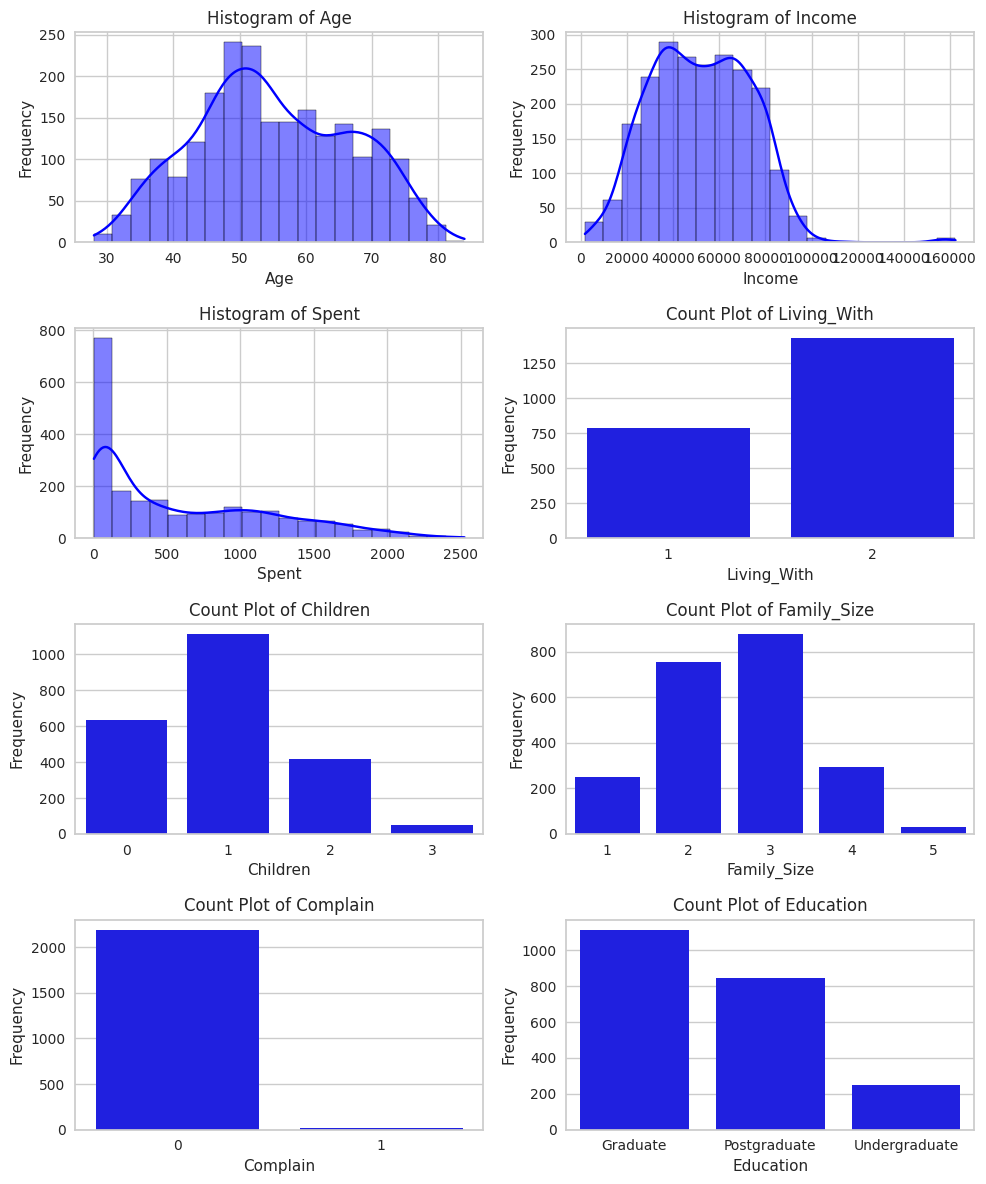

In [96]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_With', 'Children', 'Family_Size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns

# Menghitung baris yang diperlukan untuk dua kolom
num_rows = (len(all_columns) + 1) // 2

# Setup untuk matplotlib
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()

# Iterasi terhadap kolom dan membuat plot yang sesuai
for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=df_marketing, x=col, bins=20, ax=axes[i], kde=True, color='blue')  # Add density curve for continuous data
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=df_marketing, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Jika banyak kolom ganjil, sembunyikan subplot terakhir (jika tidak digunakan)
if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


Grafik yang menunjukkan distribusi data untuk kolom kontinu dan kategorikal dalam dataset, membantu dalam visualisasi distribusi dan frekuensi setiap fitur yang relevan.

# Menentukan Variabel Kategorik
Langkah ini bertujuan untuk mengidentifikasi kolom-kolom dalam dataset yang berisi data kategorikal. Kolom-kolom tersebut umumnya berisi nilai seperti label atau kategori, yang penting untuk analisis lebih lanjut, seperti pemrosesan variabel atau visualisasi.

In [97]:
# Mendapatkan variabel kategorik
cat = (df_marketing.dtypes == 'object')  # Memeriksa tipe data setiap kolom
object_cols = list(cat[cat].index)  # Mengambil nama kolom dengan tipe data object

print("Variabel kategorikal dalam dataset:", object_cols)  # Menampilkan variabel kategorikal

Variabel kategorikal dalam dataset: ['Education']


# Encoding untuk `Education`

Langkah ini mengubah kolom Education yang awalnya berisi nilai kategorikal (seperti "Undergraduate", "Graduate", "Postgraduate") menjadi nilai numerik yang lebih mudah diproses oleh model atau analisis data. Pemetaan ini dilakukan secara manual dengan menggunakan dictionary.

In [98]:
# Membuat dictionary untuk manual encoding
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}

# Melakukan pemetaan pada kolom 'Education'
df_marketing['Education'] = df_marketing['Education'].map(education_mapping)

# Label Encoding untuk Kolom Kategorikal
Langkah ini bertujuan untuk mengubah kolom-kolom dengan data kategorikal menjadi format numerik dengan Label Encoding. Teknik ini memberikan label numerik unik untuk setiap kategori yang ada dalam kolom, memungkinkan pemrosesan lebih lanjut dalam analisis data dan juga pembentukan model.

In [99]:
# Melakukan Label Encoding untuk tipe data objek
LE = LabelEncoder()
for i in object_cols:
    df_marketing[i] = df_marketing[[i]].apply(LE.fit_transform)

In [100]:
print(df_marketing["Living_With"].value_counts())
print(df_marketing["Education"].value_counts())

Living_With
2    1428
1     784
Name: count, dtype: int64
Education
1    1115
2     845
0     252
Name: count, dtype: int64


# Mengecek Ulang Jenis Data pada Setiap Kolom

In [101]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

# Menghapus Kolom dan Melakukan Scaling Data
Langkah ini bertujuan untuk menghapus fitur-fitur yang tidak diperlukan dalam analisis dan melakukan scaling pada dataset. Scaling penting untuk menghindari perbedaan skala antara fitur, terutama untuk algoritma yang sensitif terhadap skala seperti K-Means.

In [102]:
# Membuat salinan data
ds = df_marketing.copy()

# Membuat subset dari dataframe dengan menghapus fitur tentang tawaran yang diterima dan promosi
kolom_hapus = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(kolom_hapus, axis=1)

# Melakukan scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("Semua fitur sekarang telah diskaling")

Semua fitur sekarang telah diskaling


In [103]:
# Data yang telah diskalakan akan digunakan untuk mengurangi dimensi
print("Dataframe yang akan digunakan untuk pemodelan lebih lanjut:")
scaled_ds.head()

Dataframe yang akan digunakan untuk pemodelan lebih lanjut:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070


In [104]:
scaled_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   float64
 3   Teenhome             2212 non-null   float64
 4   Recency              2212 non-null   float64
 5   Wines                2212 non-null   float64
 6   Fruits               2212 non-null   float64
 7   Meat                 2212 non-null   float64
 8   Fish                 2212 non-null   float64
 9   Sweets               2212 non-null   float64
 10  Gold                 2212 non-null   float64
 11  NumDealsPurchases    2212 non-null   float64
 12  NumWebPurchases      2212 non-null   float64
 13  NumCatalogPurchases  2212 non-null   float64
 14  NumStorePurchases    2212 non-null   float64
 15  NumWebVisitsMonth    2212 non-null   f

# Reduksi Dimensi Menggunakan PCA
Proses ini digunakan untuk mengurangi jumlah fitur dalam dataset yang memiliki banyak kolom. PCA membantu dalam menjaga sebagian besar informasi yang relevan dalam data dengan mengurangi dimensi tanpa mengurangi kualitas. Di sini, kita mengurangi data menjadi 3 komponen utama yang bisa lebih mudah dianalisis.

In [105]:
# Memulai PCA untuk mengurangi dimensi menjadi 3 komponen utama
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["kolom1", "kolom2"])

# Menampilkan deskripsi statistik dari data PCA
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
kolom1,2212.0,1.092154e-16,2.797451,-5.832779,-2.500727,-0.746865,2.399444,7.288413
kolom2,2212.0,4.497106e-17,1.637053,-3.997617,-1.318296,-0.093438,1.182085,6.421669


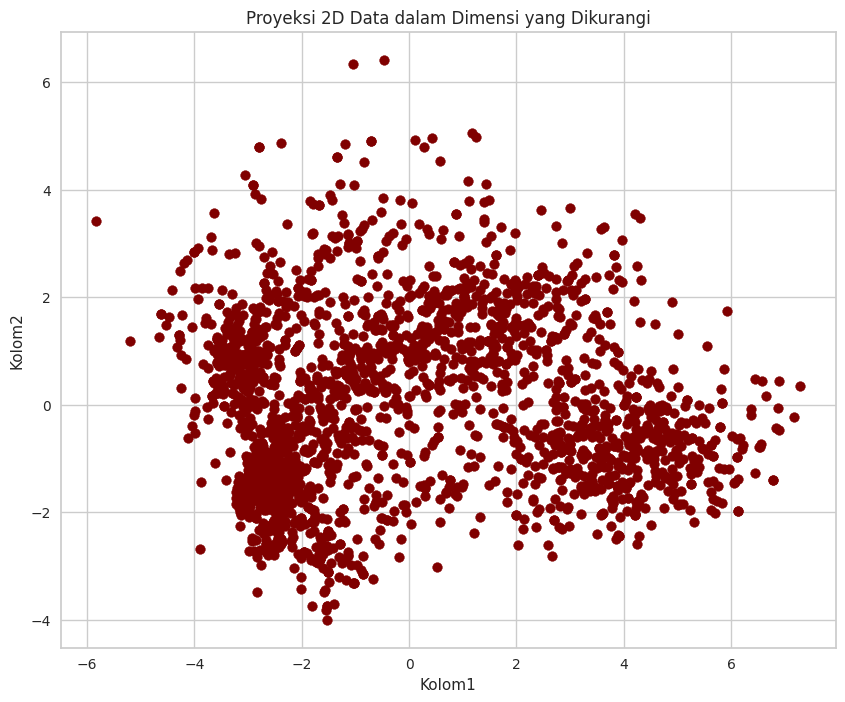

In [106]:
import matplotlib.pyplot as plt

# Ambil kolom yang sudah diproyeksikan dengan PCA
x = PCA_ds["kolom1"]  # Komponen pertama PCA
y = PCA_ds["kolom2"]  # Komponen kedua PCA

# Plot 2D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")

# Set judul dan label sumbu
ax.set_title("Proyeksi 2D Data dalam Dimensi yang Dikurangi")
ax.set_xlabel('Kolom1')
ax.set_ylabel('Kolom2')

# Tampilkan plot
plt.show()

# Menerapkan KMeans Clustering
Setelah menentukan jumlah klaster yang optimal dengan metode Elbow, model K-Means diterapkan pada data yang telah dikurangi dimensinya menggunakan PCA. Hasil klasterisasi ditambahkan ke dalam dataframe untuk setiap data sehingga bisa dianalisis lebih lanjut.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

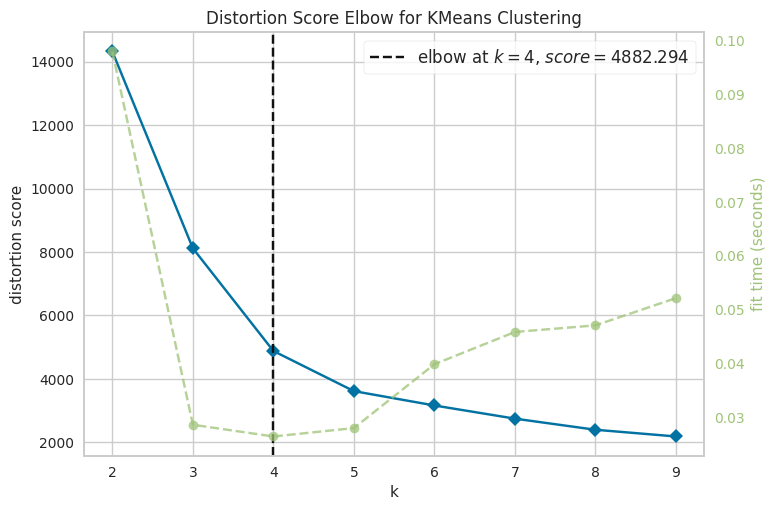

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# Gunakan KElbow untuk tentukan jumlah klaster awal
model = KMeans(random_state=42)
elbow = KElbowVisualizer(model, k=(2,10))
elbow.fit(PCA_ds)  # Gantilah dengan data yang sudah diskalakan
elbow.show()

### Menentukan Jumlah Klaster dengan Silhouette Score

**Silhouette Score** digunakan untuk mengukur seberapa baik titik data dikelompokkan dalam klaster dan seberapa terpisah klaster-klaster tersebut. Nilai Silhouette berkisar antara -1 hingga 1:
- **1**: Klaster sangat terpisah dan terdefinisi dengan baik.
- **0**: Titik berada di perbatasan antara dua klaster.
- **-1**: Titik lebih cocok untuk klaster lain.

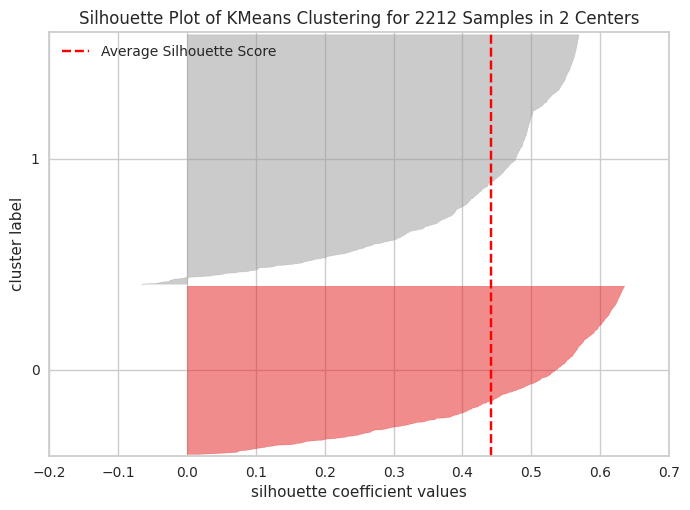

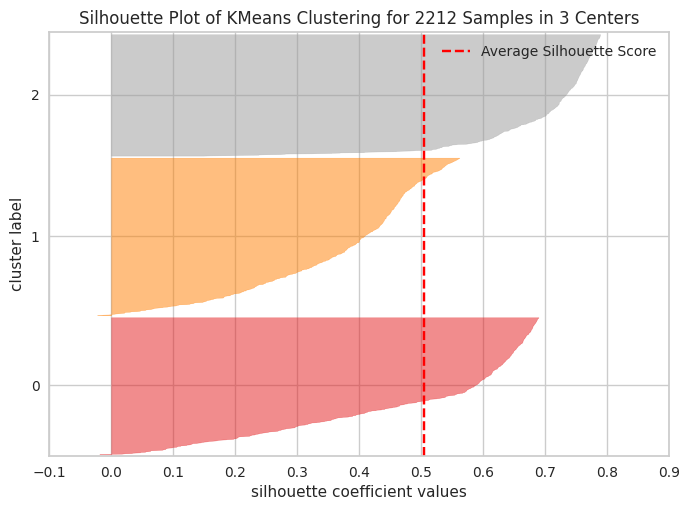

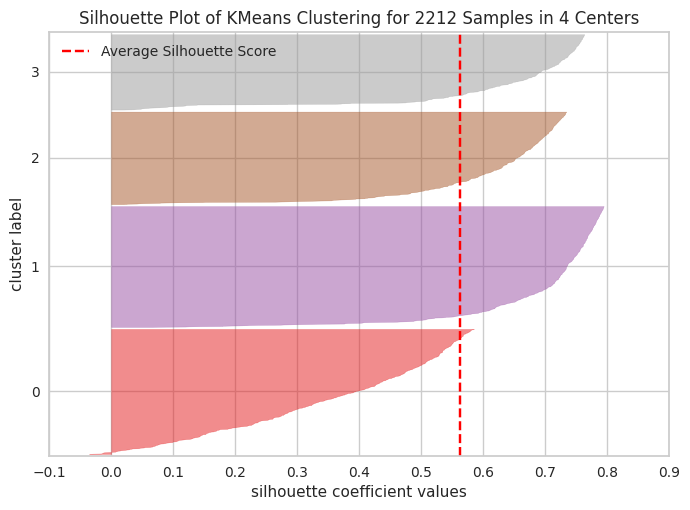

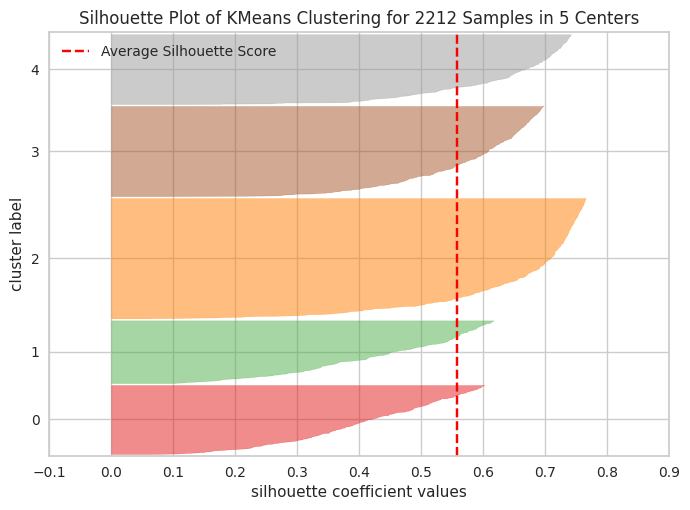

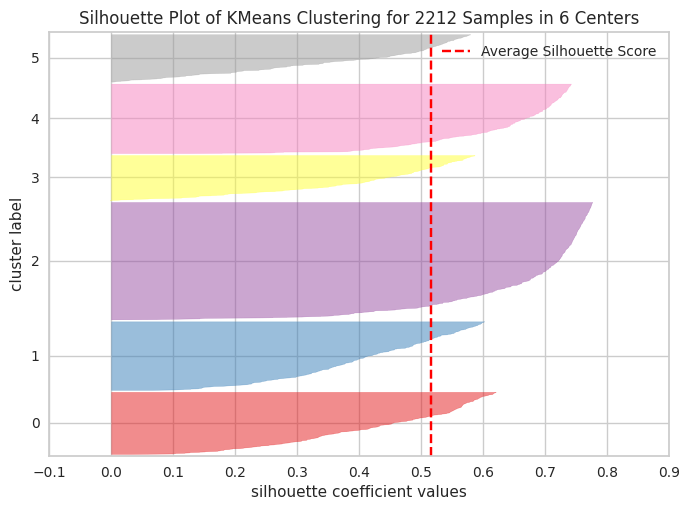

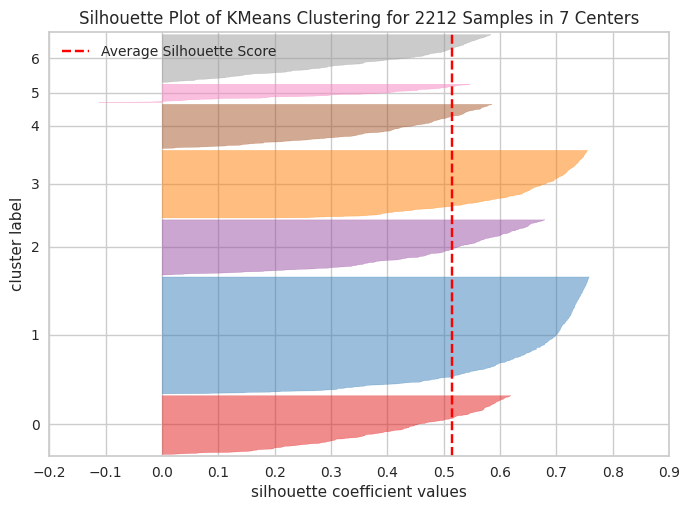

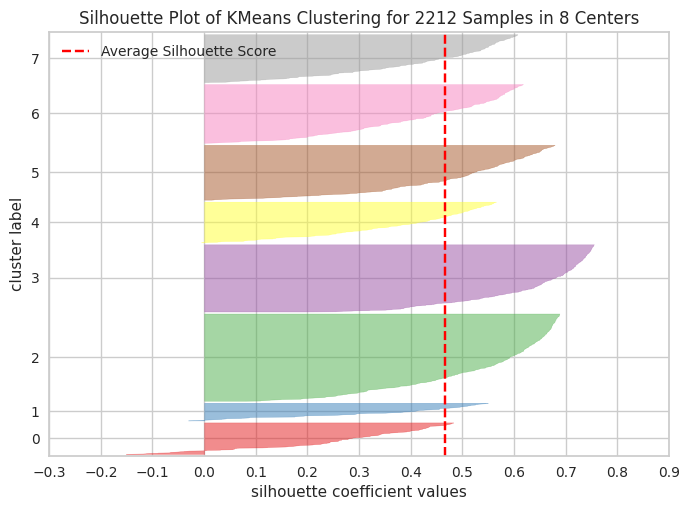

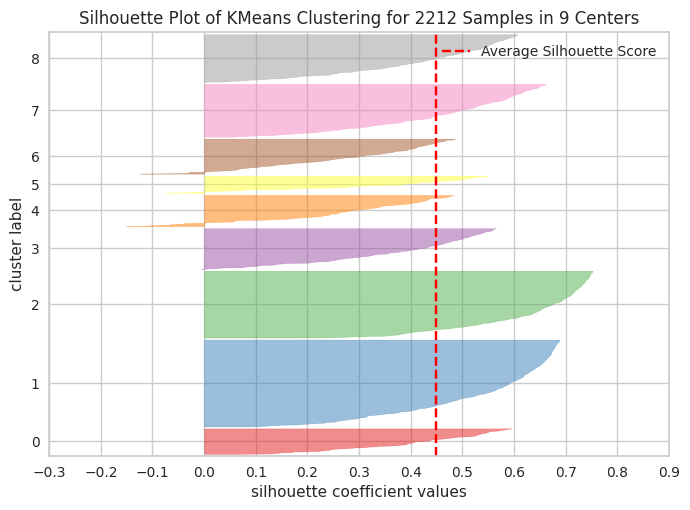

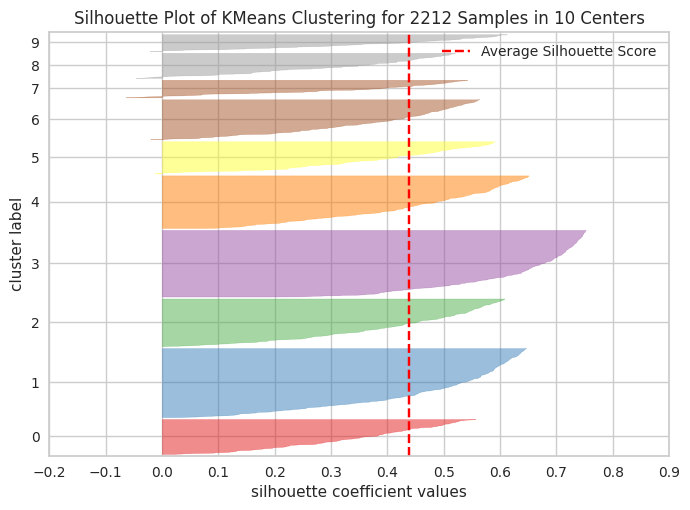

In [120]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(PCA_ds)  # data yang sudah diskalakan
    visualizer.show()

Dipilih k = 4.

In [122]:
# Memulai model KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit model dan prediksi klaster
cluster_labels = kmeans.fit_predict(PCA_ds)  # Mengubah nama variabel dari yhat_kmeans ke cluster_labels
PCA_ds["Klaster"] = cluster_labels

# Menambahkan fitur Klaster ke dalam dataframe asli.
df_marketing["Klaster"] = cluster_labels
scaled_ds["Klaster"] = cluster_labels

In [123]:
Xji = PCA_ds
labels = df_marketing["Klaster"]

# Compute and print silhouette score
score = silhouette_score(Xji, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.547


In [124]:
print(kmeans.inertia_) #menampilkan inertia score

4886.173031337307


# Visualisasi Klaster dengan Plot 3D
Setelah melakukan klasterisasi dengan KMeans, visualisasi 3D dapat digunakan untuk melihat distribusi dan pemisahan antar klaster yang dihasilkan berdasarkan tiga komponen utama setelah pengurangan dimensi menggunakan PCA.

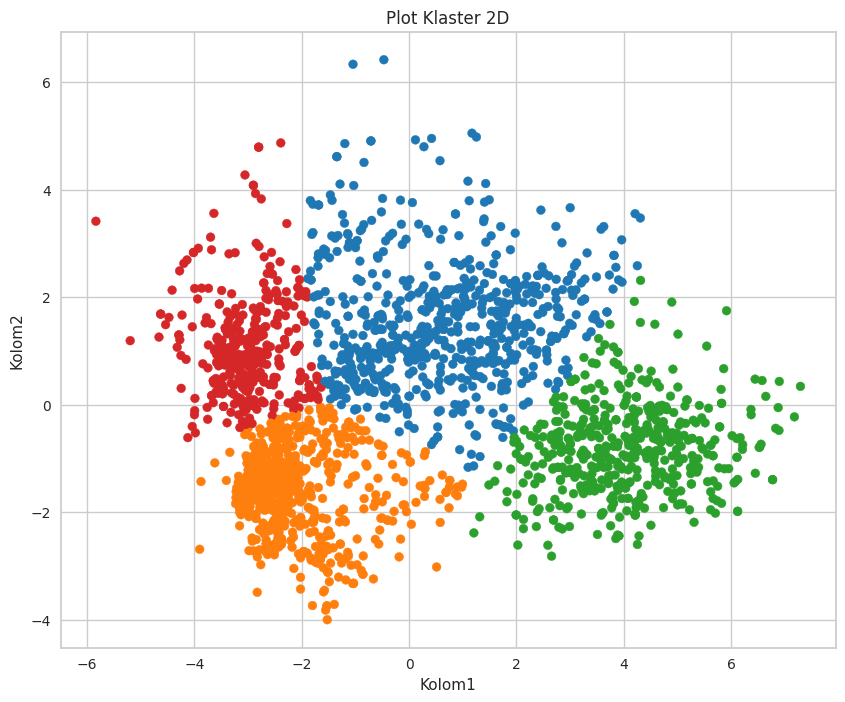

In [125]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Menyesuaikan palette warna
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
cmap = ListedColormap(palette)

# Plot 2D dengan cluster yang diwarnai sesuai dengan palette
fig, ax = plt.subplots(figsize=(10, 8))

# Plot scatter 2D dengan warna yang sesuai dengan klaster
ax.scatter(PCA_ds["kolom1"], PCA_ds["kolom2"], s=40, c=PCA_ds["Klaster"], marker='o', cmap=cmap)

ax.set_title("Plot Klaster 2D")
ax.set_xlabel('Kolom1')
ax.set_ylabel('Kolom2')
plt.show()

# Distribusi Klaster dan Analisis Hasil
Setelah klasterisasi, kita dapat menggunakan countplot untuk memvisualisasikan jumlah data yang ada pada setiap klaster yang terbentuk. Ini membantu kita melihat apakah distribusi data antar klaster seimbang atau tidak.

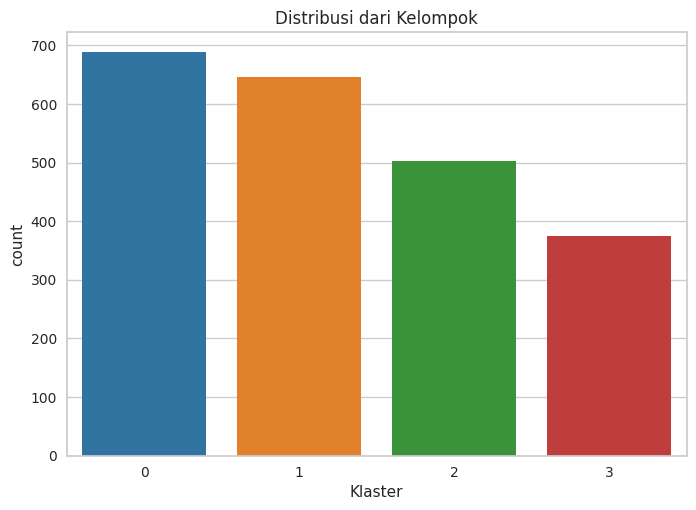

In [126]:
# Mengubah 'Klaster' menjadi variabel numerik (jika belum)
df_marketing['Klaster'] = df_marketing['Klaster'].astype(int)

# Plot countplot dengan colormap yang konsisten
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
sns.countplot(x=df_marketing["Klaster"], palette=palette)
plt.title("Distribusi dari Kelompok")
plt.show()

Dari grafik tersebut, terlihat bahwa setiap pelanggan hampir tersebar secara merata di tiap cluster. Berikutnya, akan dilihat mengenai pendapatan dan pengeluaran di masing-masing cluster.

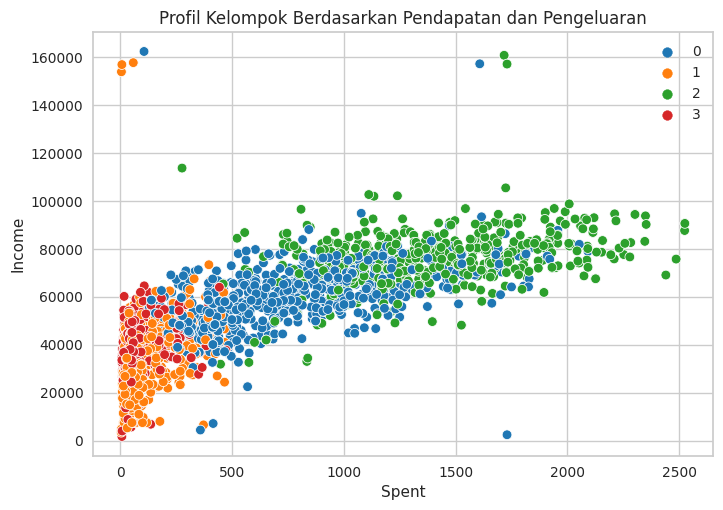

In [127]:
pl = sns.scatterplot(data=df_marketing, x=df_marketing["Spent"], y=df_marketing["Income"], hue=df_marketing["Klaster"], palette = palette)
pl.set_title("Profil Kelompok Berdasarkan Pendapatan dan Pengeluaran")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the mark

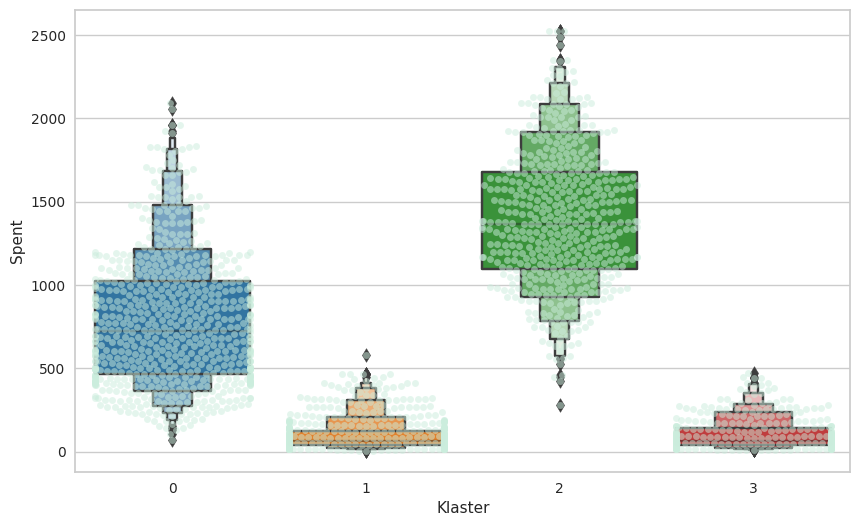

In [128]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat swarmplot
sns.swarmplot(x=df_marketing["Klaster"], y=df_marketing["Spent"], color="#CBEDDD", alpha=0.5)

# Membuat boxenplot pada grafik yang sama
sns.boxenplot(x=df_marketing["Klaster"], y=df_marketing["Spent"], palette=palette)

# Menampilkan plot
plt.show()

Dari gambar 2 plot sebelumnya, terlihat bahwa pelanggan yang memiliki pengeluaran dan pendapatan paling tinggi adalah pelanggan yang berada pada cluster 2. Sebaliknya, pelanggan pada cluster 3 cenderung memiliki pendapatan dan penghasilan yang relatif sedikit. Pelanggan pada cluster 1 memiliki profil yang relatif cukup mirip dengan cluster 3, tetapi cenderung memiliki pengeluaran yang lebih banyak. Cluster 0 memiliki profil yang relatif mirip dengan cluster 2 hanya saja dengan pengeluaran yang relatif lebih sedikit. Berikutnya, akan dilihat mengenai kebiasaan pembelian masing-masing cluster berdasarkan tempatnya dan caranya.

# Profiling

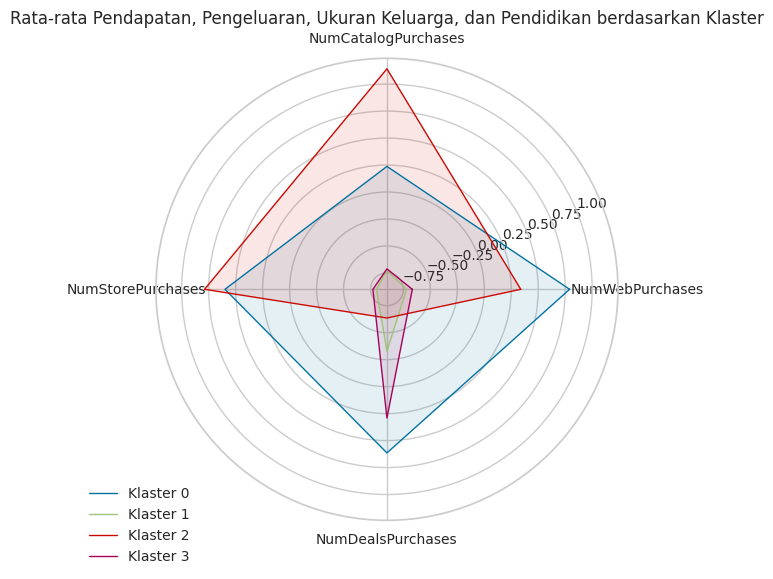

In [129]:
from math import pi
atribut = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
rata_rata_klaster = scaled_ds.groupby('Klaster')[atribut].mean().reset_index()

# Jumlah variabel yang akan diplot.
jumlah_variabel = len(atribut)

# Menghitung sudut yang masing-masing baranya berpusat pada:
sudut = [n / float(jumlah_variabel) * 2 * pi for n in range(jumlah_variabel)]
sudut += sudut[:1]  # Lengkapkan loop

# Membuat radar chart untuk setiap klaster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for indeks, baris in rata_rata_klaster.iterrows():
    nilai = baris[atribut].values.flatten().tolist()
    nilai += nilai[:1]  # Lengkapkan loop
    ax.plot(sudut, nilai, linewidth=1, linestyle='solid', label=f'Klaster {int(baris["Klaster"])}')
    ax.fill(sudut, nilai, alpha=0.1)

# Label untuk setiap atribut.
ax.set_xticks(sudut[:-1])
ax.set_xticklabels(atribut)

# Tambahkan legenda dan judul
plt.title('Rata-rata Pendapatan, Pengeluaran, Ukuran Keluarga, dan Pendidikan berdasarkan Klaster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


Dari output, terlihat bahwa pelanggan pada cluster 2 lebih cenderung melakukan pembelian pada toko dan katalog, pelanggan pada cluster 3 cenderung hanya pada pembelian dengan diskon, cluster 0 cukup seimbang antara pembelian secara web, toko, katalog, dan diskon, dan cluster 1 cenderung hanya pada pembelian dengan diskon. Berikutnya, akan dilihat mengenai kebiasaan pembelian masing-masing cluster berdasarkan apa yang dibeli.

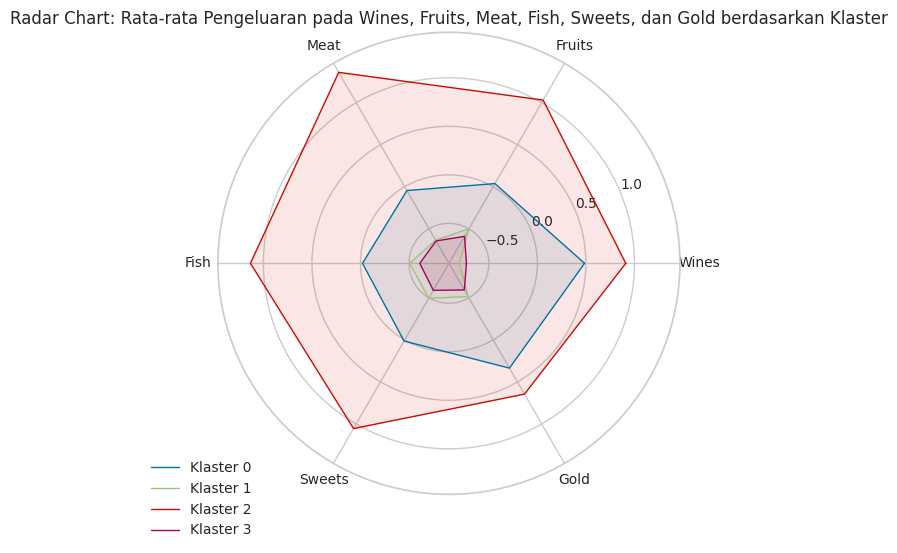

In [130]:
# Group berdasarkan 'Klaster' dan hitung rata-rata untuk ...
atribut = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
rata_rata_klaster = scaled_ds.groupby('Klaster')[atribut].mean().reset_index()

# Jumlah variabel yang akan diplot.
jumlah_variabel = len(atribut)

# Menghitung sudut yang masing-masing baranya berpusat pada:
sudut = [n / float(jumlah_variabel) * 2 * pi for n in range(jumlah_variabel)]
sudut += sudut[:1]  # Lengkapkan loop

# Membuat radar chart untuk setiap klaster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for indeks, baris in rata_rata_klaster.iterrows():
    nilai = baris[atribut].values.flatten().tolist()
    nilai += nilai[:1]  # Lengkapkan loop
    ax.plot(sudut, nilai, linewidth=1, linestyle='solid', label=f'Klaster {int(baris["Klaster"])}')
    ax.fill(sudut, nilai, alpha=0.1)

# Label untuk setiap atribut.
ax.set_xticks(sudut[:-1])
ax.set_xticklabels(atribut)

# Tambahkan legenda dan judul
plt.title('Radar Chart: Rata-rata Pengeluaran pada Wines, Fruits, Meat, Fish, Sweets, dan Gold berdasarkan Klaster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


Dari output, terlihat bahwa pelanggan pada cluster 0 lebih cenderung melakukan pembelian untuk barang wines, gold, makanan manis, buah, dan sedikit daging serta ikan, pelanggan pada cluster 1 cenderung hanya sedikit barang pada masing-masing kategori, cluster 2 melakukan banyak pembelian secara seimbang pada masing-masing barang, dan cluster 3 cenderung hanya sedikit membeli barang. Berikutnya, akan dilihat mengenai kebiasaan promosi yang diterima pada masing-masing cluster.


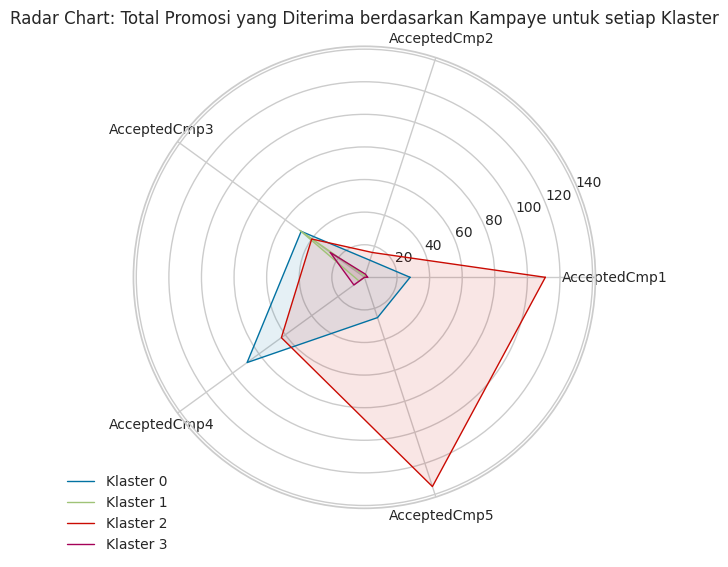

In [131]:
# Group berdasarkan 'Klaster' dan hitung jumlahnya untuk ...
atribut = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
rata_rata_klaster = df_marketing.groupby('Klaster')[atribut].sum().reset_index()

# Jumlah variabel yang akan diplot.
jumlah_variabel = len(atribut)

# Menghitung sudut yang masing-masing baranya berpusat pada:
sudut = [n / float(jumlah_variabel) * 2 * pi for n in range(jumlah_variabel)]
sudut += sudut[:1]  # Lengkapkan loop

# Membuat radar chart untuk setiap klaster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for indeks, baris in rata_rata_klaster.iterrows():
    nilai = baris[atribut].values.flatten().tolist()
    nilai += nilai[:1]  # Lengkapkan loop
    ax.plot(sudut, nilai, linewidth=1, linestyle='solid', label=f'Klaster {int(baris["Klaster"])}')
    ax.fill(sudut, nilai, alpha=0.1)

# Label untuk setiap atribut.
ax.set_xticks(sudut[:-1])
ax.set_xticklabels(atribut)

# Tambahkan legenda dan judul
plt.title('Radar Chart: Total Promosi yang Diterima berdasarkan Kampaye untuk setiap Klaster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


Dari output, terlihat bahwa pelanggan pada cluster 0 lebih cenderung menerima promo keempat, pelanggan pada cluster 1 cenderung menerima promo ketiga walaupun sedikit, cluster 2 menerima banyak promo pertama dan kelima, dan cluster 3 cenderung hanya menerima promo ketiga. Berikutnya, akan dilihat mengenai profil pembeli.

# Kesimpulan

Klaster 0:

Pelanggan di cluster ini memiliki profil yang cukup mirip dengan cluster 2, tetapi dengan pengeluaran yang lebih sedikit. Mereka cenderung melakukan pembelian dengan cara yang seimbang antara web, toko, katalog, dan diskon. Pembelian mereka lebih banyak pada kategori produk seperti wines, gold, makanan manis, buah, serta sedikit pada produk daging dan ikan. Mereka lebih sering menerima promo keempat.

Klaster 1:

Pelanggan di cluster ini memiliki pengeluaran yang lebih banyak dibandingkan cluster 3 meskipun memiliki pendapatan yang relatif rendah. Mereka lebih sering membeli produk dengan diskon, namun jumlah pembelian mereka cenderung terbatas pada produk tertentu. Pembelian mereka cenderung sedikit di tiap kategori barang. Promo yang paling sering mereka terima adalah promo ketiga.

Klaster 2:

Pelanggan di cluster ini memiliki pengeluaran dan pendapatan yang paling tinggi. Mereka cenderung melakukan pembelian di toko dan melalui katalog. Profil pembelian mereka menunjukkan keseimbangan yang baik antara berbagai kategori barang, dengan pembelian yang banyak pada produk seperti wines, gold, makanan manis, buah, serta daging dan ikan.

Klaster 3:

Pelanggan pada cluster ini cenderung memiliki pendapatan dan pengeluaran yang lebih sedikit dibandingkan dengan cluster lainnya. Mereka lebih sering melakukan pembelian menggunakan diskon. Selain itu, mereka cenderung membeli produk dengan frekuensi yang lebih rendah dibandingkan cluster lainnya. Cluster ini lebih sering menerima promo ketiga, namun cenderung lebih sedikit berpartisipasi dalam promo lainnya.

# Profil Pembeli Berdasarkan Kebiasaan Pembelian dan Promosi
Setiap cluster menunjukkan pola kebiasaan pembelian yang berbeda, baik dari segi tempat maupun jenis barang yang dibeli. Selain itu, kebiasaan dalam menerima promosi juga bervariasi antar cluster, dengan setiap cluster lebih cenderung menerima promo tertentu berdasarkan karakteristik mereka.

Secara keseluruhan, analisis klaster ini memberikan wawasan yang berharga mengenai segmentasi pelanggan yang dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih tepat sasaran sesuai dengan karakteristik masing-masing kelompok pelanggan.